In [1]:
import os
import json
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [2]:
# Assuming the JSON file contains a list of documents
file_path = '../data/data_writing_main_en//document.json'
output_directory = '../data/documents_main_en'

In [3]:
os.makedirs(output_directory, exist_ok=True)


In [58]:
doc

'{"_id":{"$oid":"66b8757d4f48c536ef480ea7"},"content":"<p>Ahora escribe tu anuncio de caridad aqu&iacute; (puedes eliminar este texto)</p>\\n<p>&iquest;Quieres que gastar tu dinero tenga sentido por una vez en la vida? Donando puedes contribuir a alcanzar un mundo mejor y sentirte realizado mientras lo haces. Nuestra organizaci&oacute;n te garantiza que se har&aacute; un buen uso de tu dinero ayudando a los m&aacute;s vulnerables.&nbsp;<br>&iquest;A qu&eacute; est&aacute;s esperando? &iexcl;Dona!</p>","name":"","chunks":[],"timestamp":{"$date":"2024-08-11T08:25:33.981Z"},"task_id":"main_task_1_66aca69be884d495377c3f30","prolific_id":"5ea5ce7be9fb245c8d7deded"}'

In [4]:
with open(file_path, 'r') as file:
    documents = file.read()

# docs = pd.DataFrame()
doc_list = []
for doc in documents.splitlines():
    data = json.loads(doc)
    pid = data['prolific_id']
    task_id = data["task_id"]
    document_id = data.get('_id').get('$oid')
    # print(document_id)
    if pid == "65e6fb8c62b34b6ef5249890" or task_id.startswith("sandbox_task_1"):
        continue
    content = data['content']
    soup = BeautifulSoup(content, "html.parser")
    plain_text = soup.get_text()
    word_count = len(plain_text.split(" "))
    # print(pid, len(plain_text.split(" ")), task_id)
    if task_id == "main_task_1_66aca63c781c99be382101f6":
        task_type = "en"
    else:
        task_type = "es"
    doc_list.append({'pid': pid, 'doc_id': document_id, 'task_type': task_type, 'content': plain_text, 'word_count': word_count})
    
    with open(f'{output_directory}/{pid}.html', 'w') as file:
        file.write(content)
    

In [63]:
docs = pd.DataFrame(doc_list)
docs.drop_duplicates(subset=['pid','task_type','content'], inplace=True)

In [64]:
docs.head()

,pid,doc_id,task_type,content,word_count
0,66549dc5c1d9f3d7238ddda1,66b72c42f209bebd4af91cd8,en,Now write your charity advertisement here (you...,11
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28
3,6543521c6e77382008aa65c1,66b72db0f209bebd4af91ce6,en,Join the Fight to Protect Our Planet's Preciou...,173
4,5cc99062d918560016acf6ac,66b72df3f209bebd4af91ce9,en,\n \n \nJoin the fight to protect our planet'...,68
5,66aa5d56ca41cb7c51d9bebb,66b735d0f209bebd4af91cf6,en,\nJoin the Fight to Save Our Planet - Togethe...,305


In [55]:
data[0]

{'_id': {'$oid': '66b728b0f209bebd4af91cd1'},
 'document_id': '66b728aaf209bebd4af91cd0',
 'task_id': 'sandbox_task_1_eng_66aca63c781c99be382101f6',
 'prolific_id': '65e6fb8c62b34b6ef5249890',
 'activity_log': {'buttonClicks': [], 'generatedContent': [], 'keyLogs': []},
 'timestamp': {'$date': '2024-08-10T08:45:36.291Z'}}

In [72]:
docs['buttonClicks'] = [[] for _ in range(len(docs))]
docs['generatedContent'] = [[] for _ in range(len(docs))]
docs['keyLogs'] = [[] for _ in range(len(docs))]

In [75]:
with open("../data/data_1108/activity_log.json", "r") as file:
    data = [json.loads(line) for line in file]
for record in data:
    pid = record.get("prolific_id")
    task_id = record.get("task_id")
    if pid == "65e6fb8c62b34b6ef5249890" or task_id.startswith("sandbox_task_1"):
        continue
    doc_id = record.get('document_id')
    buttonClicks = record['activity_log']['buttonClicks']
    generatedContent = record['activity_log']['generatedContent']
    keyLogs = record['activity_log']['keyLogs']
    idx = docs[(docs['pid'] == pid) & (docs['doc_id'] == doc_id)].index
    if not idx.empty:
        docs.at[idx[0], 'buttonClicks'] = buttonClicks
        docs.at[idx[0], 'generatedContent'] = generatedContent
        docs.at[idx[0], 'keyLogs'] = keyLogs
    # break
    # row_index = 
    # print(row_index, record.get('activity_log'))
    # docs.loc[docs['pid'] == pid, 'buttonClicks'] = record.get('activity_log').get('buttonClicks', [])
    # docs.loc[docs['pid'] == pid, 'generatedContent'] = record.get('activity_log').get('generatedContent', [])
    # docs.loc[docs['pid'] == pid, 'keyLogs'] = record.get('activity_log').get('keyLogs', [])
    # break
    # if not row_index.empty:
    #     # Update the 'activity_data' column with the activity log from the record
    #     docs.loc[row_index, 'activity_data'] = record.get('activity_log')
    # docs.loc[docs['pid']==pid, 'activity_data'] = record.get('activity_log')
    # if pid in docs['pid'].tolist() and task_id=="main_task_1_66aca63c781c99be382101f6":
        

In [80]:
df = docs.copy(deep=True)

In [81]:
df

,pid,doc_id,task_type,content,word_count,buttonClicks,generatedContent,keyLogs
0,66549dc5c1d9f3d7238ddda1,66b72c42f209bebd4af91cd8,en,Now write your charity advertisement here (you...,11,[],[],[]
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,[],[],"[{'key': 'Shift', 'timestamp': '2024-08-10T09:..."
3,6543521c6e77382008aa65c1,66b72db0f209bebd4af91ce6,en,Join the Fight to Protect Our Planet's Preciou...,173,[],"[{'feature': '@ai generation', 'prompt': ' ﻿Wr...","[{'key': 'Backspace', 'timestamp': '2024-08-10..."
4,5cc99062d918560016acf6ac,66b72df3f209bebd4af91ce9,en,\n \n \nJoin the fight to protect our planet'...,68,"[{'action': 'CREATE VARIATION', 'timestamp': '...","[{'feature': '@ai generation', 'prompt': 'help...","[{'key': 'Enter', 'timestamp': '2024-08-10T09:..."
5,66aa5d56ca41cb7c51d9bebb,66b735d0f209bebd4af91cf6,en,\nJoin the Fight to Save Our Planet - Togethe...,305,[],[],[]
6,665ee374604d2c5d4d858efd,66b73de6f209bebd4af91d00,en,SAVE OUR SPECIES! \nJoin the Fight to Protect ...,201,[],[],"[{'key': 'Backspace', 'timestamp': '2024-08-10..."
7,60c142fad3c33f80288c9aa2,66b73ea4f209bebd4af91d02,en,Join the MissionHelp us conserve nature & prot...,39,"[{'action': 'CREATE VARIATION', 'timestamp': '...","[{'feature': '@ai generation', 'prompt': 'The ...","[{'key': 'Control', 'timestamp': '2024-08-10T1..."
9,60bfc38a2ff2f5f83001ee9b,66b751f37b6559f21ae10e6c,es,wwf,1,[],[],[]
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"[{'action': 'CREATE VARIATION', 'timestamp': '...","[{'feature': '@ai generation', 'prompt': 'escr...","[{'key': 'Backspace', 'timestamp': '2024-08-10..."
11,607a01580101ea8b2652e450,66b86bb34f48c536ef480e9e,es,La WWF tiene como misión concientizar la vida ...,46,[],[],"[{'key': 'Shift', 'timestamp': '2024-08-11T07:..."


In [93]:
btn = df.explode(column='buttonClicks').iloc[:,:-2]
btn

,pid,doc_id,task_type,content,word_count,buttonClicks
0,66549dc5c1d9f3d7238ddda1,66b72c42f209bebd4af91cd8,en,Now write your charity advertisement here (you...,11,NaN
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,NaN
3,6543521c6e77382008aa65c1,66b72db0f209bebd4af91ce6,en,Join the Fight to Protect Our Planet's Preciou...,173,NaN
4,5cc99062d918560016acf6ac,66b72df3f209bebd4af91ce9,en,\n \n \nJoin the fight to protect our planet'...,68,"{'action': 'CREATE VARIATION', 'timestamp': '2..."
5,66aa5d56ca41cb7c51d9bebb,66b735d0f209bebd4af91cf6,en,\nJoin the Fight to Save Our Planet - Togethe...,305,NaN
6,665ee374604d2c5d4d858efd,66b73de6f209bebd4af91d00,en,SAVE OUR SPECIES! \nJoin the Fight to Protect ...,201,NaN
7,60c142fad3c33f80288c9aa2,66b73ea4f209bebd4af91d02,en,Join the MissionHelp us conserve nature & prot...,39,"{'action': 'CREATE VARIATION', 'timestamp': '2..."
9,60bfc38a2ff2f5f83001ee9b,66b751f37b6559f21ae10e6c,es,wwf,1,NaN
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'action': 'CREATE VARIATION', 'timestamp': '2..."
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'action': 'recipe_Gain_Statistics', 'timestam..."


In [107]:
type(btn[btn['pid']=='6124e437f703fa3b2e1ee8f6']['buttonClicks'].iloc[0])

dict

In [108]:
btn['action'] = btn['buttonClicks'].apply(lambda x: x['action'] if isinstance(x, dict) else np.nan)
btn

,pid,doc_id,task_type,content,word_count,buttonClicks,action
0,66549dc5c1d9f3d7238ddda1,66b72c42f209bebd4af91cd8,en,Now write your charity advertisement here (you...,11,NaN,NaN
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,NaN,NaN
3,6543521c6e77382008aa65c1,66b72db0f209bebd4af91ce6,en,Join the Fight to Protect Our Planet's Preciou...,173,NaN,NaN
4,5cc99062d918560016acf6ac,66b72df3f209bebd4af91ce9,en,\n \n \nJoin the fight to protect our planet'...,68,"{'action': 'CREATE VARIATION', 'timestamp': '2...",CREATE VARIATION
5,66aa5d56ca41cb7c51d9bebb,66b735d0f209bebd4af91cf6,en,\nJoin the Fight to Save Our Planet - Togethe...,305,NaN,NaN
6,665ee374604d2c5d4d858efd,66b73de6f209bebd4af91d00,en,SAVE OUR SPECIES! \nJoin the Fight to Protect ...,201,NaN,NaN
7,60c142fad3c33f80288c9aa2,66b73ea4f209bebd4af91d02,en,Join the MissionHelp us conserve nature & prot...,39,"{'action': 'CREATE VARIATION', 'timestamp': '2...",CREATE VARIATION
9,60bfc38a2ff2f5f83001ee9b,66b751f37b6559f21ae10e6c,es,wwf,1,NaN,NaN
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'action': 'CREATE VARIATION', 'timestamp': '2...",CREATE VARIATION
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'action': 'recipe_Gain_Statistics', 'timestam...",recipe_Gain_Statistics


In [117]:
btn.groupby(['task_type'])['action'].value_counts().reset_index()

,task_type,action,count
0,en,CREATE VARIATION,2
1,es,CREATE CONTINUATION,4
2,es,recipe_Gain_Statistics,3
3,es,DELETE CHUNK,2
4,es,DELETE VERSION,2
5,es,CREATE VARIATION,1
6,es,recipe_Gain_Anecdotal,1
7,es,recipe_Loss_Anecdotal,1
8,es,recipe_Loss_Statistics,1
9,es,recipe_ShortTerm,1


In [118]:
gen = df.explode(column='generatedContent')[['pid','doc_id','task_type','content','word_count','generatedContent']]
gen

,pid,doc_id,task_type,content,word_count,generatedContent
0,66549dc5c1d9f3d7238ddda1,66b72c42f209bebd4af91cd8,en,Now write your charity advertisement here (you...,11,NaN
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,NaN
3,6543521c6e77382008aa65c1,66b72db0f209bebd4af91ce6,en,Join the Fight to Protect Our Planet's Preciou...,173,"{'feature': '@ai generation', 'prompt': ' ﻿Wri..."
4,5cc99062d918560016acf6ac,66b72df3f209bebd4af91ce9,en,\n \n \nJoin the fight to protect our planet'...,68,"{'feature': '@ai generation', 'prompt': 'help ..."
5,66aa5d56ca41cb7c51d9bebb,66b735d0f209bebd4af91cf6,en,\nJoin the Fight to Save Our Planet - Togethe...,305,NaN
6,665ee374604d2c5d4d858efd,66b73de6f209bebd4af91d00,en,SAVE OUR SPECIES! \nJoin the Fight to Protect ...,201,NaN
7,60c142fad3c33f80288c9aa2,66b73ea4f209bebd4af91d02,en,Join the MissionHelp us conserve nature & prot...,39,"{'feature': '@ai generation', 'prompt': 'The m..."
9,60bfc38a2ff2f5f83001ee9b,66b751f37b6559f21ae10e6c,es,wwf,1,NaN
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'feature': '@ai generation', 'prompt': 'escri..."
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'feature': 'Gain Framing with Statistics', 'p..."


In [134]:
gen[gen['pid']=='613bd3a683a2ac56a4119aa6']['generatedContent'].iloc[-1]

{'feature': '@ai generation',
 'prompt': 'revisa la ortografia de este texto\ufeff',
 'response': 'No hay un texto proporcionado para revisar. Si deseas, puedes proporcionarme el texto y yo puedo ayudarte con la corrección ortográfica.',
 'timestamp': '2024-08-11T08:36:08.992Z'}

In [135]:
gen['feature'] = gen['generatedContent'].apply(lambda x: x['feature'] if isinstance(x, dict) and 'feature' in x else np.nan)
gen['response'] = gen['generatedContent'].apply(lambda x: x['response'] if isinstance(x, dict) and 'response' in x else np.nan)

gen

,pid,doc_id,task_type,content,word_count,generatedContent,feature,response
0,66549dc5c1d9f3d7238ddda1,66b72c42f209bebd4af91cd8,en,Now write your charity advertisement here (you...,11,NaN,NaN,NaN
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,NaN,NaN,NaN
3,6543521c6e77382008aa65c1,66b72db0f209bebd4af91ce6,en,Join the Fight to Protect Our Planet's Preciou...,173,"{'feature': '@ai generation', 'prompt': ' ﻿Wri...",@ai generation,Here's a potential ad for the World Wildlife F...
4,5cc99062d918560016acf6ac,66b72df3f209bebd4af91ce9,en,\n \n \nJoin the fight to protect our planet'...,68,"{'feature': '@ai generation', 'prompt': 'help ...",@ai generation,Here is a 70-word persuasive charity advertise...
5,66aa5d56ca41cb7c51d9bebb,66b735d0f209bebd4af91cf6,en,\nJoin the Fight to Save Our Planet - Togethe...,305,NaN,NaN,NaN
6,665ee374604d2c5d4d858efd,66b73de6f209bebd4af91d00,en,SAVE OUR SPECIES! \nJoin the Fight to Protect ...,201,NaN,NaN,NaN
7,60c142fad3c33f80288c9aa2,66b73ea4f209bebd4af91d02,en,Join the MissionHelp us conserve nature & prot...,39,"{'feature': '@ai generation', 'prompt': 'The m...",@ai generation,Here's a short advertisement for WWF:**Join th...
9,60bfc38a2ff2f5f83001ee9b,66b751f37b6559f21ae10e6c,es,wwf,1,NaN,NaN,NaN
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'feature': '@ai generation', 'prompt': 'escri...",@ai generation,**¡Únete a la lucha por la vida silvestre!**¿S...
10,6124e437f703fa3b2e1ee8f6,66b7567a7b6559f21ae10e76,es,¡Únete a la lucha por la vida silvestre!\n¿Sab...,219,"{'feature': 'Gain Framing with Statistics', 'p...",Gain Framing with Statistics,More than 20% of species on the planet are thr...


In [136]:
def calculate_word_match_percentage(content, response):
    if pd.isna(content) or pd.isna(response):
        return np.nan  # Return NaN if either content or response is NaN
    
    # Split content and response into words
    content_words = set(content.split())
    response_words = set(response.split())
    
    # Calculate the number of matching words
    matching_words = content_words.intersection(response_words)
    
    # Calculate the percentage of matching words
    return (len(matching_words) / len(content_words)) * 100 if len(content_words) > 0 else 0

# Apply the function to each row
gen['match_percentage'] = gen.apply(lambda row: calculate_word_match_percentage(row['content'], row['response']), axis=1)

In [380]:
gen[['content', 'response', 'feature', 'match_percentage', 'task_type']]

,content,response,feature,match_percentage,task_type
0,Now write your charity advertisement here (you...,NaN,NaN,NaN,en
2,Hi. I am writing to tell you about WWF. We are...,NaN,NaN,NaN,en
3,Join the Fight to Protect Our Planet's Preciou...,Here's a potential ad for the World Wildlife F...,@ai generation,83.464567,en
4,\n \n \nJoin the fight to protect our planet'...,Here is a 70-word persuasive charity advertise...,@ai generation,96.551724,en
5,\nJoin the Fight to Save Our Planet - Togethe...,NaN,NaN,NaN,en
6,SAVE OUR SPECIES! \nJoin the Fight to Protect ...,NaN,NaN,NaN,en
7,Join the MissionHelp us conserve nature & prot...,Here's a short advertisement for WWF:**Join th...,@ai generation,92.105263,en
9,wwf,NaN,NaN,NaN,es
10,¡Únete a la lucha por la vida silvestre!\n¿Sab...,**¡Únete a la lucha por la vida silvestre!**¿S...,@ai generation,83.750000,es
10,¡Únete a la lucha por la vida silvestre!\n¿Sab...,More than 20% of species on the planet are thr...,Gain Framing with Statistics,0.000000,es


In [385]:
gen[['content', 'response', 'feature', 'match_percentage', 'task_type']].groupby(['feature','task_type'])['match_percentage'].mean().reset_index().to

,feature,task_type,match_percentage
0,@ai generation,en,90.707185
1,@ai generation,es,40.102814
2,Gain Framing with Anecdotal Information,es,0.625000
3,Gain Framing with Statistics,es,14.141414
4,Loss Framing with Anecdotal Information,es,0.625000
5,Loss Framing with Statistics,es,0.625000
6,Short-term Temporal Framing,es,0.625000
7,continuation,es,13.320707


In [149]:
gen.groupby(['pid','doc_id', 'task_type'])['match_percentage'].mean()

pid                       doc_id                    task_type
5c7076993065320001bde043  66b72cf6f209bebd4af91ce1  en                 NaN
5cc99062d918560016acf6ac  66b72df3f209bebd4af91ce9  en           96.551724
5ea5ce7be9fb245c8d7deded  66b8757d4f48c536ef480ea7  es                 NaN
607a01580101ea8b2652e450  66b86bb34f48c536ef480e9e  es                 NaN
60bfc38a2ff2f5f83001ee9b  66b751f37b6559f21ae10e6c  es                 NaN
60c142fad3c33f80288c9aa2  66b73ea4f209bebd4af91d02  en           92.105263
6124e437f703fa3b2e1ee8f6  66b7567a7b6559f21ae10e76  es           14.107143
613bd3a683a2ac56a4119aa6  66b873634f48c536ef480ea5  es           28.080808
6543521c6e77382008aa65c1  66b72db0f209bebd4af91ce6  en           83.464567
66549dc5c1d9f3d7238ddda1  66b72c42f209bebd4af91cd8  en                 NaN
665ee374604d2c5d4d858efd  66b73de6f209bebd4af91d00  en                 NaN
66aa5d56ca41cb7c51d9bebb  66b735d0f209bebd4af91cf6  en                 NaN
Name: match_percentage, dtype: float64

In [132]:
gen.groupby(['task_type'])['feature'].value_counts().reset_index()

,task_type,feature,count
0,en,@ai generation,3
1,es,@ai generation,7
2,es,Gain Framing with Statistics,3
3,es,continuation,2
4,es,Gain Framing with Anecdotal Information,1
5,es,Loss Framing with Anecdotal Information,1
6,es,Loss Framing with Statistics,1
7,es,Short-term Temporal Framing,1


In [95]:
keylogs = df.explode(column='keyLogs')[['pid','doc_id','task_type','content','word_count','keyLogs']]
keylogs

,pid,doc_id,task_type,content,word_count,keyLogs
0,66549dc5c1d9f3d7238ddda1,66b72c42f209bebd4af91cd8,en,Now write your charity advertisement here (you...,11,NaN
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,"{'key': 'Shift', 'timestamp': '2024-08-10T09:0..."
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,"{'key': 'Shift', 'timestamp': '2024-08-10T09:0..."
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,"{'key': 'Shift', 'timestamp': '2024-08-10T09:0..."
2,5c7076993065320001bde043,66b72cf6f209bebd4af91ce1,en,Hi. I am writing to tell you about WWF. We are...,28,"{'key': 'Shift', 'timestamp': '2024-08-10T09:0..."
...,...,...,...,...,...,...
13,5ea5ce7be9fb245c8d7deded,66b8757d4f48c536ef480ea7,es,Ahora escribe tu anuncio de caridad aquí (pued...,59,"{'key': 'Backspace', 'timestamp': '2024-08-11T..."
13,5ea5ce7be9fb245c8d7deded,66b8757d4f48c536ef480ea7,es,Ahora escribe tu anuncio de caridad aquí (pued...,59,"{'key': ' ', 'timestamp': '2024-08-11T08:36:21..."
13,5ea5ce7be9fb245c8d7deded,66b8757d4f48c536ef480ea7,es,Ahora escribe tu anuncio de caridad aquí (pued...,59,"{'key': 'Enter', 'timestamp': '2024-08-11T08:3..."
13,5ea5ce7be9fb245c8d7deded,66b8757d4f48c536ef480ea7,es,Ahora escribe tu anuncio de caridad aquí (pued...,59,"{'key': 'Backspace', 'timestamp': '2024-08-11T..."


In [133]:
keylogs[keylogs['pid']=='613bd3a683a2ac56a4119aa6']['keyLogs'].iloc[-2]

{'key': 'e', 'timestamp': '2024-08-11T08:39:58.523Z'}

In [79]:
docs[docs['pid']=='60c142fad3c33f80288c9aa2']['generatedContent'].tolist()

[[{'feature': '@ai generation',
   'prompt': 'The mission of the World Wildlife Fund (WWF) is to conserve nature and reduce the most pressing threats to the diversity of life on Earth. Our vision is to build a future in which people live in harmony with nature. We aim to save a planet rich with biodiversity by reconciling the needs of human beings with the needs of other species. We strive to practice humane conservation, instilling a reverence for nature and balancing it with a belief in human potential. From local communities to global organizations, we inspire and support those advancing the cause of conservation. As a voice for the voiceless creatures of our world, we dedicate our talents, knowledge, and passion to enriching life, spirit, and the wonder of nature.( write one short advertisements for World Wildlife Fund (WWF)) charity. Each advertisement should consist of a maximum of 50 words.)\ufeff',
   'response': "Here's a short advertisement for WWF:**Join the Mission**Help us

In [340]:
en_qual = pd.read_csv('../data/data_1108/en.csv')
en_qual

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,PROLIFIC_PID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Please indicate your level of agreement regard...,Please indicate your level of agreement regard...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,PROLIFIC_PID
1,10-08-24 11:06,10-08-24 11:07,IP Address,220.233.4.46,100,80,TRUE,10-08-24 11:07,R_4OkvEoFr7VGdkiz,NaN,...,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,5c7076993065320001bde043
2,10-08-24 11:10,10-08-24 11:11,IP Address,109.159.170.172,100,81,TRUE,10-08-24 11:11,R_2I5AvpsEvmkMkXU,NaN,...,Strongly Agree,Disagree,Agree,Agree,Somewhat Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,5cc99062d918560016acf6ac
3,10-08-24 11:09,10-08-24 11:12,IP Address,99.233.24.244,100,178,TRUE,10-08-24 11:12,R_7nwmR2mr2zyIL3M,NaN,...,Neither Agree nor Disagree,Disagree,Somewhat Agree,Somewhat Agree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Neither Agree nor Disagree,Somewhat Agree,6543521c6e77382008aa65c1
4,10-08-24 12:21,10-08-24 12:23,IP Address,41.216.204.45,100,76,TRUE,10-08-24 12:23,R_2Gy8V1UIyHKps17,NaN,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,60c142fad3c33f80288c9aa2
5,10-08-24 13:30,10-08-24 13:32,IP Address,41.4.0.201,100,92,TRUE,10-08-24 13:32,R_8gUfFRHKaL5dfgV,NaN,...,Agree,Agree,Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,66aa5d56ca41cb7c51d9bebb


In [341]:
# Filter relevant columns (OWN, COLAB, LM categories)
own_cols = [col for col in en_qual.columns if 'OWN' in col]
colab_cols = [col for col in en_qual.columns if 'COLAB' in col]
lm_cols = [col for col in en_qual.columns if 'LM' in col]
feat_columns = [col for col in en_qual.columns if 'FEAT_' in col]
relevant_columns = ['PROLIFIC_PID'] + own_cols + colab_cols + lm_cols + feat_columns

In [342]:
en_qual = en_qual[relevant_columns]
en_qual.columns

Index(['PROLIFIC_PID', 'OWN_1', 'OWN_2', 'OWN_3', 'COLAB_1', 'COLAB_2',
       'COLAB_3', 'LM_1', 'LM_2', 'LM_3', 'LM_4', 'FEAT_1', 'FEAT_2', 'FEAT_3',
       'FEAT_4', 'FEAT_5', 'FEAT_6', 'FEAT_7', 'FEAT_8'],
      dtype='object')

In [343]:
en_qual

,PROLIFIC_PID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,PROLIFIC_PID,Please indicate your level of agreement regard...,Please indicate your level of agreement regard...,Please indicate your level of agreement regard...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...
1,5c7076993065320001bde043,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,30,4,8,9,0,94,3,5
2,5cc99062d918560016acf6ac,Somewhat Disagree,Strongly Agree,Disagree,Agree,Agree,Somewhat Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,NaN,NaN,NaN,NaN,100,100,NaN
3,6543521c6e77382008aa65c1,Somewhat Disagree,Neither Agree nor Disagree,Disagree,Somewhat Agree,Somewhat Agree,Somewhat Disagree,Somewhat Disagree,Somewhat Agree,Neither Agree nor Disagree,Somewhat Agree,32,44,14,15,25,55,100,70
4,60c142fad3c33f80288c9aa2,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Somewhat Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,31,17,42,6,10,13,81,100
5,66aa5d56ca41cb7c51d9bebb,Agree,Agree,Agree,Agree,Agree,Somewhat Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,59,55,67,73,49,64,86,73


In [344]:
scale_mapping = {
     "Strongly Disagree": 1,
    "Disagree": 2,
    "Somewhat Disagree": 3,
    "Neither Agree nor Disagree": 4,
    "Somewhat Agree": 5,
    "Agree": 6,
    "Strongly Agree": 7
}

In [345]:
df_relevant = en_qual.applymap(lambda x: scale_mapping.get(x, x) if isinstance(x, str) else x)
df_relevant[feat_columns] = df_relevant[feat_columns].fillna(0)
df_relevant = df_relevant[1:]
df_relevant

C:\Users\shrey\AppData\Local\Temp\ipykernel_22024\3206755977.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_relevant = en_qual.applymap(lambda x: scale_mapping.get(x, x) if isinstance(x, str) else x)


In [368]:
feature_mapping = {
    "FEAT_1": "Gain Framing with Anecdotal Information",
    "FEAT_2": "Loss Framing with Anecdotal Information",
    "FEAT_3": "Gain Framing with Statistics",
    "FEAT_4": "Loss Framing with Statistics",
    "FEAT_5": "Short-term Temporal Framing",
    "FEAT_6": "Long-term Temporal Framing",
    "FEAT_7": "@ai to Generate New Texts",
    "FEAT_8": "Create Continuation"
}
categories = {
    "Ownership": ["OWN_1", "OWN_2", "OWN_3"],
    "Benefits of Co-writing ": ["COLAB_1", "COLAB_2", "COLAB_3"],
    "LLM Prowess": ["LM_1", "LM_2", "LM_3", "LM_4"],
}

In [347]:
df_relevant

,PROLIFIC_PID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
1,5c7076993065320001bde043,4,4,4,4,4,4,4,4,4,4,30,4,8,9,0,94,3,5
2,5cc99062d918560016acf6ac,3,7,2,6,6,3,7,7,7,7,0,0,0,0,0,100,100,0
3,6543521c6e77382008aa65c1,3,4,2,5,5,3,3,5,4,5,32,44,14,15,25,55,100,70
4,60c142fad3c33f80288c9aa2,7,7,7,7,7,5,6,7,7,7,31,17,42,6,10,13,81,100
5,66aa5d56ca41cb7c51d9bebb,6,6,6,6,6,5,6,7,7,7,59,55,67,73,49,64,86,73


In [369]:

final_results = {}

for category, columns in categories.items():
    if category != "Features":
        category_data = df_relevant[columns].apply(pd.to_numeric, errors='coerce')
        mean_value = category_data.mean(axis=1).mean()
        std_value = category_data.std(axis=1).mean()
        final_results[f"{category}_mean"] = f"{mean_value:.2f} ± {std_value:.2f}"

# Calculate and format each individual feature
for feature, description in feature_mapping.items():
    df_relevant[feature] = df_relevant[feature].astype(int)
    mean_value = df_relevant[feature].mean()
    std_value = df_relevant[feature].std()
    final_results[f"{description}_mean"] = f"{mean_value:.2f} ± {std_value:.2f}"

# Convert the results to a DataFrame for easy viewing
final_results_df = pd.DataFrame(final_results, index=[0])

In [370]:
final_results_df

,Ownership_mean,Benefits of Co-writing _mean,LLM Prowess_mean,Gain Framing with Anecdotal Information_mean,Loss Framing with Anecdotal Information_mean,Gain Framing with Statistics_mean,Loss Framing with Statistics_mean,Short-term Temporal Framing_mean,Long-term Temporal Framing_mean,@ai to Generate New Texts_mean,Create Continuation_mean
0,4.80 ± 0.73,5.07 ± 0.92,5.75 ± 0.39,30.40 ± 20.89,24.00 ± 24.42,26.20 ± 27.75,20.60 ± 29.79,16.80 ± 20.71,65.20 ± 34.90,74.00 ± 40.58,49.60 ± 44.59


In [371]:
es_qual = pd.read_csv('../data/data_1108/es.csv')
es_qual

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,PROLIFIC_PID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Please indicate your level of agreement regard...,Please indicate your level of agreement regard...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,PROLIFIC_PID
1,10-08-24 14:08,10-08-24 14:10,IP Address,92.178.89.212,100,88,TRUE,10-08-24 14:10,R_8DZ8CZFdeUCKaCS,NaN,...,Strongly Disagree,Strongly Disagree,Somewhat Agree,Somewhat Disagree,Strongly Agree,Agree,Somewhat Disagree,Disagree,Agree,6124e437f703fa3b2e1ee8f6
2,11-08-24 9:49,11-08-24 9:52,IP Address,181.43.38.118,100,172,TRUE,11-08-24 9:52,R_5OrgdXMKI5MizIQ,NaN,...,Somewhat Agree,Strongly Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,607a01580101ea8b2652e450
3,11-08-24 10:37,11-08-24 10:40,IP Address,104.28.88.126,100,202,TRUE,11-08-24 10:40,R_2u6MpM8lVKgsbpT,NaN,...,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Neither Agree nor Disagree,Disagree,Somewhat Disagree,Neither Agree nor Disagree,5ea5ce7be9fb245c8d7deded
4,11-08-24 10:39,11-08-24 10:42,IP Address,187.189.58.239,100,132,TRUE,11-08-24 10:42,R_7dvrC6HhV7XU5cW,NaN,...,Somewhat Agree,Disagree,Somewhat Agree,Somewhat Agree,Neither Agree nor Disagree,Somewhat Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,613bd3a683a2ac56a4119aa6


In [372]:
es_qual = es_qual[relevant_columns]
es_qual

,PROLIFIC_PID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,PROLIFIC_PID,Please indicate your level of agreement regard...,Please indicate your level of agreement regard...,Please indicate your level of agreement regard...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Please indicate your level of agreement with t...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...,Rate usefulness of the features you interacted...
1,6124e437f703fa3b2e1ee8f6,Somewhat Disagree,Strongly Disagree,Strongly Disagree,Somewhat Agree,Somewhat Disagree,Strongly Agree,Agree,Somewhat Disagree,Disagree,Agree,30,30,90,80,60,60,100,70
2,607a01580101ea8b2652e450,Neither Agree nor Disagree,Somewhat Agree,Strongly Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,NaN,NaN,80,86,33,74,NaN,93
3,5ea5ce7be9fb245c8d7deded,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Neither Agree nor Disagree,Disagree,Somewhat Disagree,Neither Agree nor Disagree,29,22,42,14,8,12,96,17
4,613bd3a683a2ac56a4119aa6,Somewhat Agree,Somewhat Agree,Disagree,Somewhat Agree,Somewhat Agree,Neither Agree nor Disagree,Somewhat Agree,Neither Agree nor Disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,61,NaN,100,NaN,NaN,NaN,94,50


In [373]:
df_relevant_es = es_qual.applymap(lambda x: scale_mapping.get(x, x) if isinstance(x, str) else x)
df_relevant_es = df_relevant_es[1:]
df_relevant_es[feat_columns] = df_relevant_es[feat_columns].fillna(0)
df_relevant_es

C:\Users\shrey\AppData\Local\Temp\ipykernel_22024\2571238046.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_relevant_es = es_qual.applymap(lambda x: scale_mapping.get(x, x) if isinstance(x, str) else x)


,PROLIFIC_PID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
1,6124e437f703fa3b2e1ee8f6,3,1,1,5,3,7,6,3,2,6,30,30,90,80,60,60,100,70
2,607a01580101ea8b2652e450,4,5,7,4,4,6,4,4,4,4,0,0,80,86,33,74,0,93
3,5ea5ce7be9fb245c8d7deded,1,1,7,1,1,7,4,2,3,4,29,22,42,14,8,12,96,17
4,613bd3a683a2ac56a4119aa6,5,5,2,5,5,4,5,4,4,4,61,0,100,0,0,0,94,50


In [374]:
final_results_es = {}

for category, columns in categories.items():
    if category != "Features":
        category_data = df_relevant_es[columns].apply(pd.to_numeric, errors='coerce')
        mean_value = category_data.mean(axis=1).mean()
        std_value = category_data.std(axis=1).mean()
        final_results_es[f"{category}_mean"] = f"{mean_value:.2f} ± {std_value:.2f}"

# Calculate and format each individual feature
for feature, description in feature_mapping.items():
    df_relevant_es[feature] = df_relevant_es[feature].astype(int)
    mean_value = df_relevant_es[feature].mean()
    std_value = df_relevant_es[feature].std()
    final_results_es[f"{description}_mean"] = f"{mean_value:.2f} ± {std_value:.2f}"

# Convert the results to a DataFrame for easy viewing
final_results_df_es = pd.DataFrame(final_results_es, index=[0])

In [375]:
final_results_df['task_type'] = 'en'
final_results_df_es['task_type'] = 'es'

In [377]:
pd.concat([final_results_df, final_results_df_es]).to_excel('pilot_results.xlsx', index=False)

In [214]:
final = []

,task_type,Ownership,Collaboration,LLM Prowess
0,EN,5.0 ± 1.83,5.33 ± 0.86,6.19 ± 1.30
1,ES,3.5 ± 1.55,4.33 ± 0.90,3.94 ± 0.47


# key log

In [2]:
with open("../data/data_1108/activity_log.json", "r") as file:
    data = [json.loads(line) for line in file]

In [15]:
data[-1]['activity_log']

{'buttonClicks': [{'action': 'CREATE CONTINUATION',
   'timestamp': '2024-08-11T08:17:35.875Z'},
  {'action': 'CREATE CONTINUATION', 'timestamp': '2024-08-11T08:17:42.051Z'},
  {'action': 'CREATE CONTINUATION', 'timestamp': '2024-08-11T08:17:45.397Z'},
  {'action': 'recipe_Gain_Statistics',
   'timestamp': '2024-08-11T08:24:41.102Z'},
  {'action': 'recipe_Gain_Statistics',
   'timestamp': '2024-08-11T08:25:51.100Z'},
  {'action': 'DELETE CHUNK', 'timestamp': '2024-08-11T08:27:43.455Z'},
  {'action': 'DELETE VERSION', 'timestamp': '2024-08-11T08:27:43.614Z'},
  {'action': 'DELETE CHUNK', 'timestamp': '2024-08-11T08:27:45.752Z'},
  {'action': 'DELETE VERSION', 'timestamp': '2024-08-11T08:27:45.919Z'}],
 'generatedContent': [{'feature': 'continuation',
   'prompt': 'La WWE es una de las organizaciones más importantes que tiene la humanidad,&nbsp;',
   'response': "La WWE es una de las organizaciones más importantes que tiene la humanidad,&nbsp; Here's a possible continuation:- text: La WW

In [16]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [22]:
activity_log

'buttonClicks'

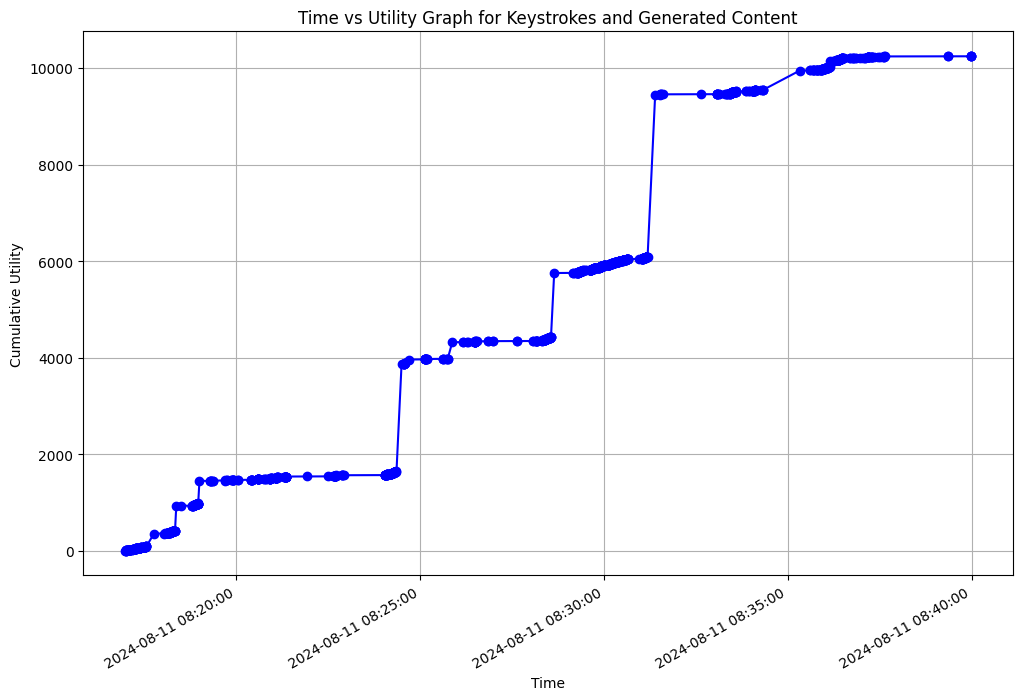

In [24]:
events = []
filtered_data = data[-1]['activity_log']
# for activity_log in filtered_data:
for stroke in filtered_data['keyLogs']:
    events.append({
        'type': 'key',
        'content': stroke['key'],
        'timestamp': datetime.fromisoformat(stroke['timestamp'].replace('Z', '+00:00'))
    })
for content in filtered_data['generatedContent']:
    events.append({
        'type': 'generated',
        'content': content['response'],
        'timestamp': datetime.fromisoformat(content['timestamp'].replace('Z', '+00:00'))
    })

# Sort events by timestamp
events.sort(key=lambda x: x['timestamp'])
utility = 0
time_stamps = []
cumulative_utility = []

# Calculate utility from sorted events
for event in events:
    if event['type'] == 'key':
        key = event['content']
        if key != 'shift' and key != 'capslock':  # Ignoring shift and caps lock
            if key == 'backspace':
                utility -= 1
            else:
                utility += 1
    elif event['type'] == 'generated':
        utility += len(event['content'])  # Utility is the length of the generated content
    
    # Record time and cumulative utility
    time_stamps.append(event['timestamp'])
    cumulative_utility.append(utility)

# Plotting the graph
plt.figure(figsize=(12, 8))
plt.plot(time_stamps, cumulative_utility, marker='o', linestyle='-', color='b')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gcf().autofmt_xdate()

plt.title('Time vs Utility Graph for Keystrokes and Generated Content')
plt.xlabel('Time')
plt.ylabel('Cumulative Utility')
plt.grid(True)
plt.show()
    
    # break

In [26]:
import plotly.express as px


In [39]:
filtered_data = data[-1]['activity_log']
events = []
# Combine keyLogs and generatedContent
# for activity_log in filtered_data:
filtered_data = data[-1]['activity_log']
# for activity_log in filtered_data:
for stroke in filtered_data['keyLogs']:
    events.append({
        'type': 'key',
        'content': str.lower(stroke['key']),
        'timestamp': datetime.fromisoformat(stroke['timestamp'].replace('Z', '+00:00'))
    })
for content in filtered_data['generatedContent']:
    if 'feature' in content:
        feature = content['feature']
    else:
        feature = "new recipe"
    events.append({
        'type': 'generated',
        'content': content['response'],
        'feature': feature,
        'timestamp': datetime.fromisoformat(content['timestamp'].replace('Z', '+00:00'))
    })
# Sort events by timestamp
events.sort(key=lambda x: x['timestamp'])

# Calculate the relative time
start_time = events[0]['timestamp']
for event in events:
    event['relative_time'] = (event['timestamp'] - start_time).total_seconds()

# Initialize utility and lists for cumulative utility
utility = 0
cumulative_utility = []

# Calculate utility from sorted events and prepare for plotting
for event in events:
    if event['type'] == 'key':
        key = event['content']
        if key != 'shift' and key != 'capslock':  # Ignoring shift and caps lock
            if key == 'backspace':
                utility -= 1
            else:
                utility += 1
    elif event['type'] == 'generated':
        utility += len(event['content'])  # Utility is the length of the generated content
    
    # Record cumulative utility
    cumulative_utility.append(utility)

# Prepare the DataFrame for plotting
df = pd.DataFrame(events)
df['cumulative_utility'] = cumulative_utility

# Plot using Plotly Express
fig = px.line(df, x='relative_time', y='cumulative_utility', title='Time vs Utility with Feature and Backspace Highlights',
              labels={'relative_time': 'Relative Time (seconds)', 'cumulative_utility': 'Cumulative Utility'})

# Highlight and annotate feature usage
feature_events = df[df['type'] == 'generated']
fig.add_scatter(x=feature_events['relative_time'], y=feature_events['cumulative_utility'], mode='markers+text',
                text=feature_events['feature'], textposition='top center', name='Feature Usage')

# Highlight and annotate backspace events
backspace_events = df[(df['type'] == 'key') & (df['content'] == 'backspace')]
fig.add_scatter(x=backspace_events['relative_time'], y=backspace_events['cumulative_utility'], mode='markers+text',
                text='Backspace', textposition='top right', name='Backspace')

# Show the plot
fig.show()

In [40]:
df['content'].unique()

array(['shift', 'l', 'a', ' ', 'w', 'e', 's', 'u', 'n', 'd', 'o', 'r',
       'g', 'backspace', 'i', 'z', 'c', 'm', 'dead', 'á', 'p', 't', 'q',
       'h', ',',
       "La WWE es una de las organizaciones más importantes que tiene la humanidad,&nbsp; Here's a possible continuation:- text: La WWE es una de las organizaciones más importantes que tiene la humanidad,&nbsp;  - continuation: con millones de seguidores en todo el mundo.",
       'enter', 'control', 'altgraph', '@', 'b', 'f',
       'La WWE (World Wrestling Entertainment) es una empresa de entretenimiento deportivo estadounidense fundada en 1952 por Jess McMahon y Toots Mondt. La WWE es conocida por sus eventos de lucha libre profesional, como WrestleMania, SummerSlam y Survivor Series, así como por su programa de televisión principal, Monday Night Raw. La empresa también tiene una división de desarrollo de talentos para jóvenes luchadores, llamada NXT, y cuenta con un gran número de campeonatos y premios en la industria del w

In [ ]:
utility = 0
time_stamps = []
cumulative_utility = []

# Processing the keystrokes
for stroke in keystrokes:
    key = stroke['key']
    timestamp = datetime.fromisoformat(stroke['timestamp'].replace('Z', '+00:00'))
    
    # Adjust utility
    if key != 'shift' and key != 'capslock':  # Ignoring shift and caps lock
        if key == 'backspace':
            utility -= 1
        else:
            utility += 1
    
    # Record time and cumulative utility
    time_stamps.append(timestamp)
    cumulative_utility.append(utility)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(time_stamps, cumulative_utility, marker='o', linestyle='-', color='b')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

plt.title('Time vs Utility Graph for Keystrokes')
plt.xlabel('Time')
plt.ylabel('Cumulative Utility')
plt.grid(True)
plt.show()